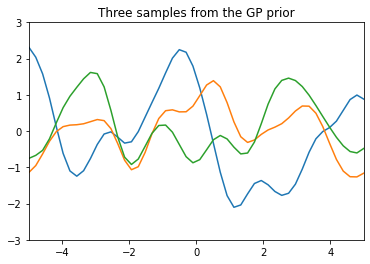

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(edgeitems=100, linewidth=100000)

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1) # convert from row vector to column vector

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.4
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

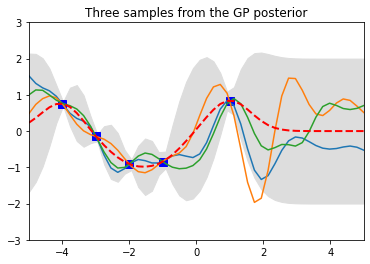

In [4]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()

In [ ]:
A = np.array([[6, 15, 55],
              [15, 55, 225],
              [55, 225, 979]])

L = np.zeros([3, 3])

def cholesky(K):
    size = len(K)
    L = np.zeros([size, size])
    pd_sum, sq_sum = 0, 0
    for i in range(len(K)):
        for j in range(len(K)):
            if i >= j:
                if i==j:
                    for k in range(j):
                        sq_sum += L[j, k]**2
                    L[i, j] = (K[i, j] - sq_sum)**0.5
                    sq_sum = 0
                else:
                    for k in range(j):
                        pd_sum += L[i, k] * L[j, k]
                    L[i, j] = (K[i, j] - pd_sum) / L[j, j]
                    pd_sum = 0
    return L